**Coding Etiquette & Excel Reporting - Task Part 1**

Importing libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Importing data

In [2]:
#Create path
path = r'C:\Users\mngit\OneDrive\Data Analytics\Project Excercises\Achievement 4\Instacart Basket Analysis' 

In [3]:
# import orders_products_customers
orders_products_customers = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df_prods = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False )

In [5]:
orders_products_customers.shape

(32404859, 33)

In [6]:
#show all columns
pd.set_option('display.max_columns', None)

In [7]:
orders_products_customers.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependants,status,income
0,2539329,1,1,2,8,7.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Personally identifiable information (PII)
i) first_name ii) last_name  - both columns to be dropped

In [8]:
orders_products_customers = orders_products_customers.drop(['first_name','last_name'],axis = 'columns')

In [9]:
#confirm column drop
orders_products_customers.shape

(32404859, 31)

Comparing customer behavior in different geographic areas

In [10]:
#create region flag by state
NE = ['Main', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota','Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia','North Carolina', 'South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas', 'Louisiana']
W = ['Idaho', 'Montana', 'Wyoming', 'Nevada','Utah','Colorado','Arizona','New Mexico','Alaska', 'Washington','Oregon','California','Hawaii']

In [11]:
#create 'region' column using flag
orders_products_customers.loc[orders_products_customers['state'].isin(NE), 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'].isin(MW), 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'].isin(S), 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'].isin(W), 'region'] = 'West'

In [12]:
#print frequency of 
orders_products_customers['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5084153
NaN            638583
Name: region, dtype: int64

In [13]:
#spending habits comparison between the different U.S. regions
crosstab = pd.crosstab(orders_products_customers['region'], orders_products_customers['spending_flag'], dropna = False)

In [14]:
#print crosstab
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,94050,4990103
South,209691,10582194
West,160354,8132559


Low revenue customers

In [15]:
#locate low-activity customers and normal activity(more than 5 orderd) customers
orders_products_customers.loc[orders_products_customers['max_order'] <5, 'customer_revenue_rate' ] = 1
orders_products_customers.loc[orders_products_customers['max_order'] >=5, 'customer_revenue_rate' ] = 0

In [16]:
orders_products_customers['customer_revenue_rate' ].value_counts()

0.0    30964564
1.0     1440295
Name: customer_revenue_rate, dtype: int64

In [17]:
#create new data sets by customer revenue i) low_revenue_customers ii) Instacart_final
low_revenue_customers = orders_products_customers.loc[orders_products_customers['customer_revenue_rate'] == 1]
Instacart_final = orders_products_customers.loc[orders_products_customers['customer_revenue_rate'] == 0]

In [18]:
#confirm data set
low_revenue_customers['customer_revenue_rate'].value_counts()

1.0    1440295
Name: customer_revenue_rate, dtype: int64

In [19]:
#Export low_revenue_customers
low_revenue_customers.to_clipboard()

In [20]:
Instacart_final.shape

(30964564, 33)

Customer Profiling

In [21]:
Instacart_final['age'].min()

18

In [22]:
Instacart_final['age'].max()

81

In [23]:
Instacart_final['income'].min()

25903

In [24]:
Instacart_final['income'].max()

593901

In [25]:
#list departments
df_prods.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Customer Profiling based on age, income, goods ordered and number of dependents
          *family                                   single adult*
           dependents >= 1                          dependents = 0
           __________________________________________________________________
          *Age group
          18-24 young adult
          25-44 adult
          45-64 middle aged
          65-81 seniors
          __________________________________________________________________
          *Income
          25K - 38K - extremly low income
          39K - 62K - very Low income
          63K - 70K - low Income
          71K - 85K - Median Income
          86K - 99K - Moderate income
          100K +    - High income
    **Source https://www.hcd.ca.gov/grants-funding/income-limits/state-and-federal-income-limits/docs/income-limits-2020.pdf **
           
           *departments 
           bulk purchases  (department_id  10 )   
           baby products   (department_id  18 )     
          

In [27]:
#create family_status flag
Instacart_final.loc[Instacart_final['no_of_dependants'] <1,'family_status'] = 'single adult'
Instacart_final.loc[Instacart_final['no_of_dependants'] > 0,'family_status'] = 'parent'

In [28]:
#check frequency of 'family_status' flag 
Instacart_final['family_status'].value_counts(dropna = False)

parent          23224883
single adult     7739681
Name: family_status, dtype: int64

In [29]:
#confirm flag
Instacart_final.tail(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_of_dependants,status,income,region,customer_revenue_rate,family_status
32404850,3308056,106143,22,4,20,10.0,19675,1,1,both,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,0.0,single adult
32404851,2988973,106143,23,2,22,5.0,19675,1,1,both,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,0.0,single adult
32404852,930,106143,24,6,12,4.0,19675,1,1,both,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,0.0,single adult
32404853,467253,106143,25,6,16,7.0,19675,1,1,both,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,0.0,single adult
32404854,156685,106143,26,4,23,5.0,19675,1,1,both,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,0.0,single adult


In [31]:
#create age_group flag
Instacart_final.loc[(Instacart_final['age'] > 17) & (Instacart_final['age'] <25),'age_group'] = 'young adult'
Instacart_final.loc[(Instacart_final['age'] >= 25) & (Instacart_final['age'] <45),'age_group'] = 'adult'
Instacart_final.loc[(Instacart_final['age'] >= 45) & (Instacart_final['age'] <65),'age_group'] = 'middle aged'
Instacart_final.loc[Instacart_final['age'] >= 65,'age_group'] = 'senior'

In [32]:
#check frequency of 'family_status' flag 
Instacart_final['age_group'].value_counts(dropna = False)

middle aged    9690051
adult          9663775
senior         8195544
young adult    3415194
Name: age_group, dtype: int64

In [34]:
#create income_category flag
Instacart_final.loc[(Instacart_final['income'] >= 24000) & (Instacart_final['income'] <39000),'income_category'] = 'extremly low income'
Instacart_final.loc[(Instacart_final['income'] >= 39000) & (Instacart_final['income'] <63000),'income_category'] = 'very Low income'
Instacart_final.loc[(Instacart_final['income'] >= 63000) & (Instacart_final['income'] <71000),'income_category'] = 'low Income'
Instacart_final.loc[(Instacart_final['income'] >= 71000) & (Instacart_final['income'] <86000),'income_category'] = 'median Income'
Instacart_final.loc[(Instacart_final['income'] >= 86000) & (Instacart_final['income'] <100000),'income_category'] = 'moderate income'
Instacart_final.loc[Instacart_final['income'] >= 100000,'income_category'] = 'high income'

In [35]:
#check frequency of 'income_category' flag 
Instacart_final['income_category'].value_counts(dropna = False)

high income            14207402
very Low income         5085198
moderate income         4474408
median Income           3483048
low Income              2252721
extremly low income     1461787
Name: income_category, dtype: int64

In [37]:
#create indicative_goods flag - (Bulk and baby items)
Instacart_final.loc[(Instacart_final['department_id'] == 10) ,'indicative_goods'] = 'bulk purchases'
Instacart_final.loc[(Instacart_final['department_id'] == 18) ,'indicative_goods'] = 'baby purchases'

In [38]:
Instacart_final['indicative_goods'].value_counts(dropna = False)

NaN               30520721
baby purchases      410392
bulk purchases       33451
Name: indicative_goods, dtype: int64

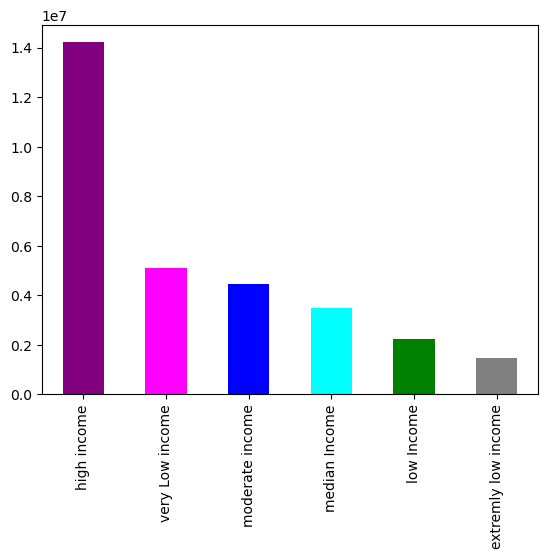

In [39]:
#create bar chart of 'income_category'
bar_income = Instacart_final['income_category'].value_counts().plot.bar(color =['purple','magenta', 'blue', 'cyan', 'green','grey'])

visualization showing the distribution of profiles

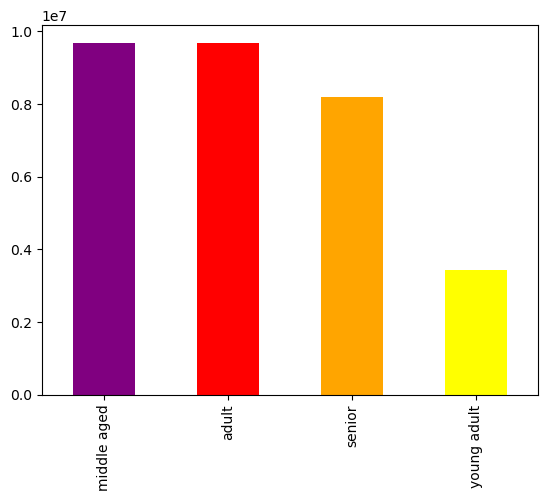

In [40]:
#create bar chart of 'age_group'
bar_age = Instacart_final['age_group'].value_counts().plot.bar(color =['purple','red','orange', 'yellow', 'grey'])

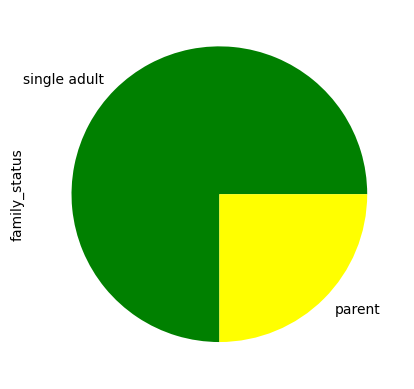

In [41]:
#create pie chart of 'family_status'
pie_family = Instacart_final['family_status'].value_counts().plot.pie(labels = ['single adult', 'parent'], colors =['green','yellow'])

Aggregate on a customer-profile level for usage frequency and expenditure.

In [42]:
# compare order_hour_of_day by age_group
Instacart_final.groupby('age_group').agg({'order_hour_of_day': ['min', 'max', 'mean']})

order_hour_of_day               
                          min max       mean
age_group                                   
adult                       0  23  13.409085
middle aged                 0  23  13.420086
senior                      0  23  13.412806
young adult                 0  23  13.386135

In [43]:
# compare order_hour_of_day by family_status
Instacart_final.groupby('family_status').agg({'order_hour_of_day': ['min', 'max', 'mean']})

order_hour_of_day               
                            min max       mean
family_status                                 
parent                        0  23  13.407581
single adult                  0  23  13.421183

In [44]:
#compare income by family_status
Instacart_final.groupby('family_status').agg({'income': ['min', 'max', 'mean']})

income                      
                 min     max          mean
family_status                             
parent         25911  593901  99602.238016
single adult   25903  584097  99896.801937

In [45]:
#compare income by age_group
Instacart_final.groupby('age_group').agg({'income': ['min', 'max', 'mean']})

income                       
               min     max           mean
age_group                                
adult        25903  592409   79782.344533
middle aged  29018  591089  116010.015464
senior       29001  593901  115870.266216
young adult  25937  396364   70759.742029

In [46]:
#compare indicative goods by family_status
Instacart_final.groupby('family_status').agg({'indicative_goods': ['count']})

,indicative_goods
,count
family_status,
parent,332515
single adult,111328


In [50]:
#department frequency
Instacart_final['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [51]:
#compare number of orders by family_status
Instacart_final.groupby('family_status').agg({'order_number': ['count']})

,order_number
,count
family_status,
parent,23224883
single adult,7739681


In [52]:
#compare mean_prices by age_group
Instacart_final.groupby('age_group').agg({'mean_prices': ['min', 'max', 'mean']})

mean_prices                         
                    min           max       mean
age_group                                       
adult            1.0000   6983.593023  11.722935
middle aged      1.0000  15006.940000  12.112030
senior           1.2625  14042.512281  11.757768
young adult      2.0000  10209.987755  12.444676

Comparison customer profiles with regions and departments

In [53]:
#compare max number of orders by region
Instacart_final.groupby('region').agg({'max_order': ['count']})

,max_order
,count
region,
Midwest,7261513
Northeast,4856020
South,10311139
West,7927227


In [54]:
#compare number of income_category by region
crosstab_region_income = pd.crosstab(Instacart_final['region'], Instacart_final['income_category'], dropna = False)

In [55]:
crosstab_region_income

income_category,extremly low income,high income,low Income,median Income,moderate income,very Low income
region,,,,,,
Midwest,341454,3400093,530452,802061,1017827,1169626
Northeast,224488,2238933,331912,550070,707494,803123
South,503367,4663945,730162,1198974,1507414,1707277
West,360679,3626880,614802,862233,1150006,1312627


In [56]:
#compare age_group by region
crosstab_region_age = pd.crosstab(Instacart_final['age_group'], Instacart_final['region'], dropna = False)

In [57]:
crosstab_region_age

region,Midwest,Northeast,South,West
age_group,,,,
adult,2279362,1499961,3242576,2462360
middle aged,2286479,1509994,3194966,2510995
senior,1904046,1310996,2708461,2098230
young adult,791626,535069,1165136,855642


In [58]:
#compare spending flag by region
crosstab_region_spending = pd.crosstab(Instacart_final['region'], Instacart_final['spending_flag'], dropna = False)

In [59]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,89517,4766503
South,199339,10111800
West,152288,7774939


In [60]:
#compare department by region
crosstab_region_department = pd.crosstab(Instacart_final['region'], Instacart_final['department_id'], dropna = False)

In [61]:
crosstab_region_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,100398,158260,420334,156155,237459,1212490,166992,95741,645143,234464,15563
Northeast,330743,5451,177649,1413718,21804,39698,411225,15951,128697,4884,66179,106244,277540,104285,157758,812415,110518,64680,437610,158718,10253
South,709906,11579,371620,3027476,48813,84649,859419,29909,272813,11180,142496,224120,591754,223172,337458,1723016,230061,139511,916780,333620,21787
West,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,106647,173830,457886,173619,260221,1327060,178200,102428,711329,257352,15906


In [63]:
#compare number of customers by region
Instacart_final.groupby('region').agg({'user_id': ['count']})

,user_id
,count
region,
Midwest,7261513
Northeast,4856020
South,10311139
West,7927227


Text(0, 0.5, 'Customers')

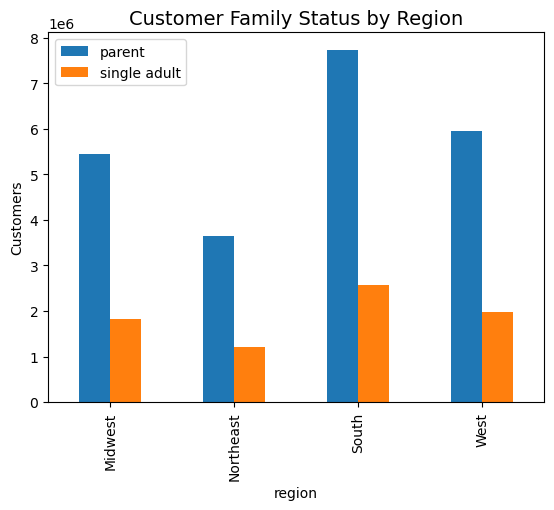

In [64]:
#bar chart - family status by region
crosstab_region_family_bar = pd.crosstab(Instacart_final['region'], Instacart_final['family_status'], dropna = False)
family_region_bar = crosstab_region_family_bar.plot(kind = 'bar')
plt.title('Customer Family Status by Region', fontsize = 14)
plt.legend(loc = 'upper left', ncol = 1)
plt.ylabel('Customers')


Text(0, 0.5, 'Customers')

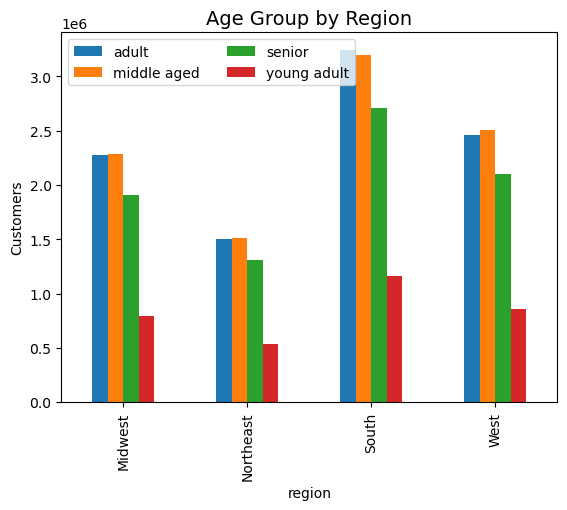

In [65]:
#bar chart - age_group by region
crosstab_region_age_bar = pd.crosstab(Instacart_final['region'], Instacart_final['age_group'], dropna = False)
age_region_bar = crosstab_region_age_bar.plot(kind = 'bar')
plt.title('Age Group by Region', fontsize = 14)
plt.legend(loc = 'upper left', ncol = 2)
plt.ylabel('Customers')

Text(0, 0.5, 'customers')

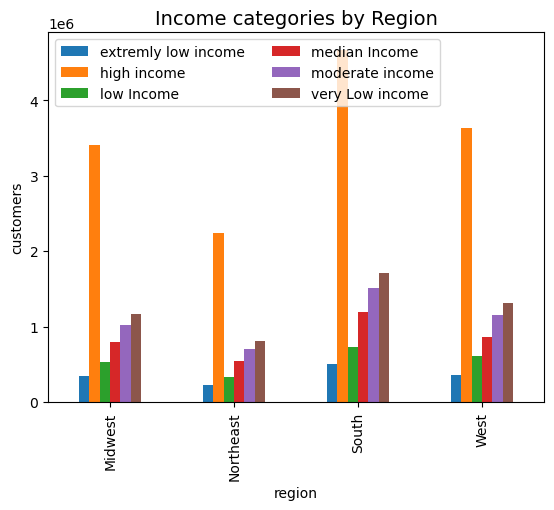

In [66]:
#bar chart - income category by region
crosstab_region_income_bar = pd.crosstab(Instacart_final['region'], Instacart_final['income_category'], dropna = False)
income_region_bar = crosstab_region_income_bar.plot(kind = 'bar')
plt.title('Income categories by Region', fontsize = 14)
plt.legend(loc = 'upper left', ncol = 2)
plt.ylabel('customers')

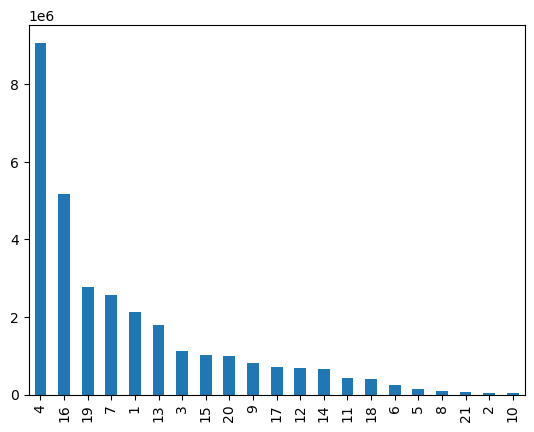

In [67]:
#bar graph on department
bar_department = Instacart_final['department_id'].value_counts().plot.bar()

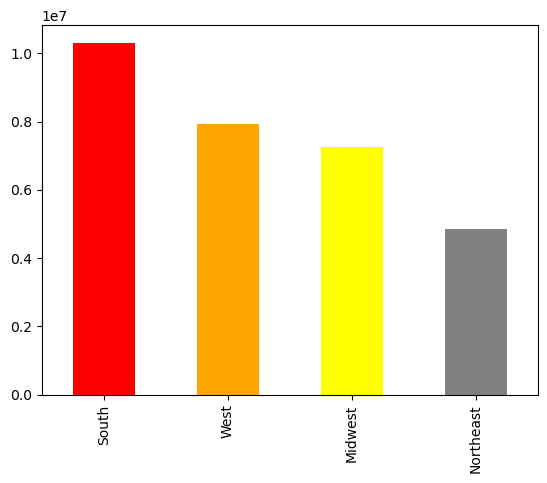

In [68]:
#bar graph region
bar_department = Instacart_final['region'].value_counts().plot.bar(color =['red','orange', 'yellow', 'grey'])

Exporting Visualizations and Datasets

In [69]:
#list departments
df_prods.tail()

,Unnamed: 0,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [70]:
Instacart_final.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_of_dependants,status,income,region,customer_revenue_rate,family_status,age_group,income_category,indicative_goods
0,2539329,1,1,2,8,7.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0.0,parent,adult,very Low income,NaN
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0.0,parent,adult,very Low income,NaN
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0.0,parent,adult,very Low income,NaN
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0.0,parent,adult,very Low income,NaN
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,0.0,parent,adult,very Low income,NaN


In [71]:
#Export charts
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','bar_income.png'))
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','bar_age.png'))
pie_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','pie_family_status.png'))
family_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','bar_family_region.png'))
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','bar_age_region.png'))
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','bar_income_region.png'))
bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Instacart Final Visualizations','bar_department.png'))

In [72]:
#Export datasets
Instacart_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_final.pkl'))
low_revenue_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_revenue_customers.pkl'))
orders_products_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [73]:
Instacart_final.shape

(30964564, 37)